In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import my_scripts.WiSe as WiSe
import matplotlib.pyplot as plt
import my_scripts.data_cleaning as dc
import my_scripts.TabNet_trainer as tn
import my_scripts.XGBoost_trainer as xg
import my_scripts.RidgeRegression_trainer as rr

# 1. Collect Insights

In [27]:
df = pd.read_csv('customer_data.csv')
df = df.drop(columns=['Customer', 'Effective To Date'])
target = 'Response'
df[target] = df[target].apply(lambda x: 0 if x == 'No' else 1)

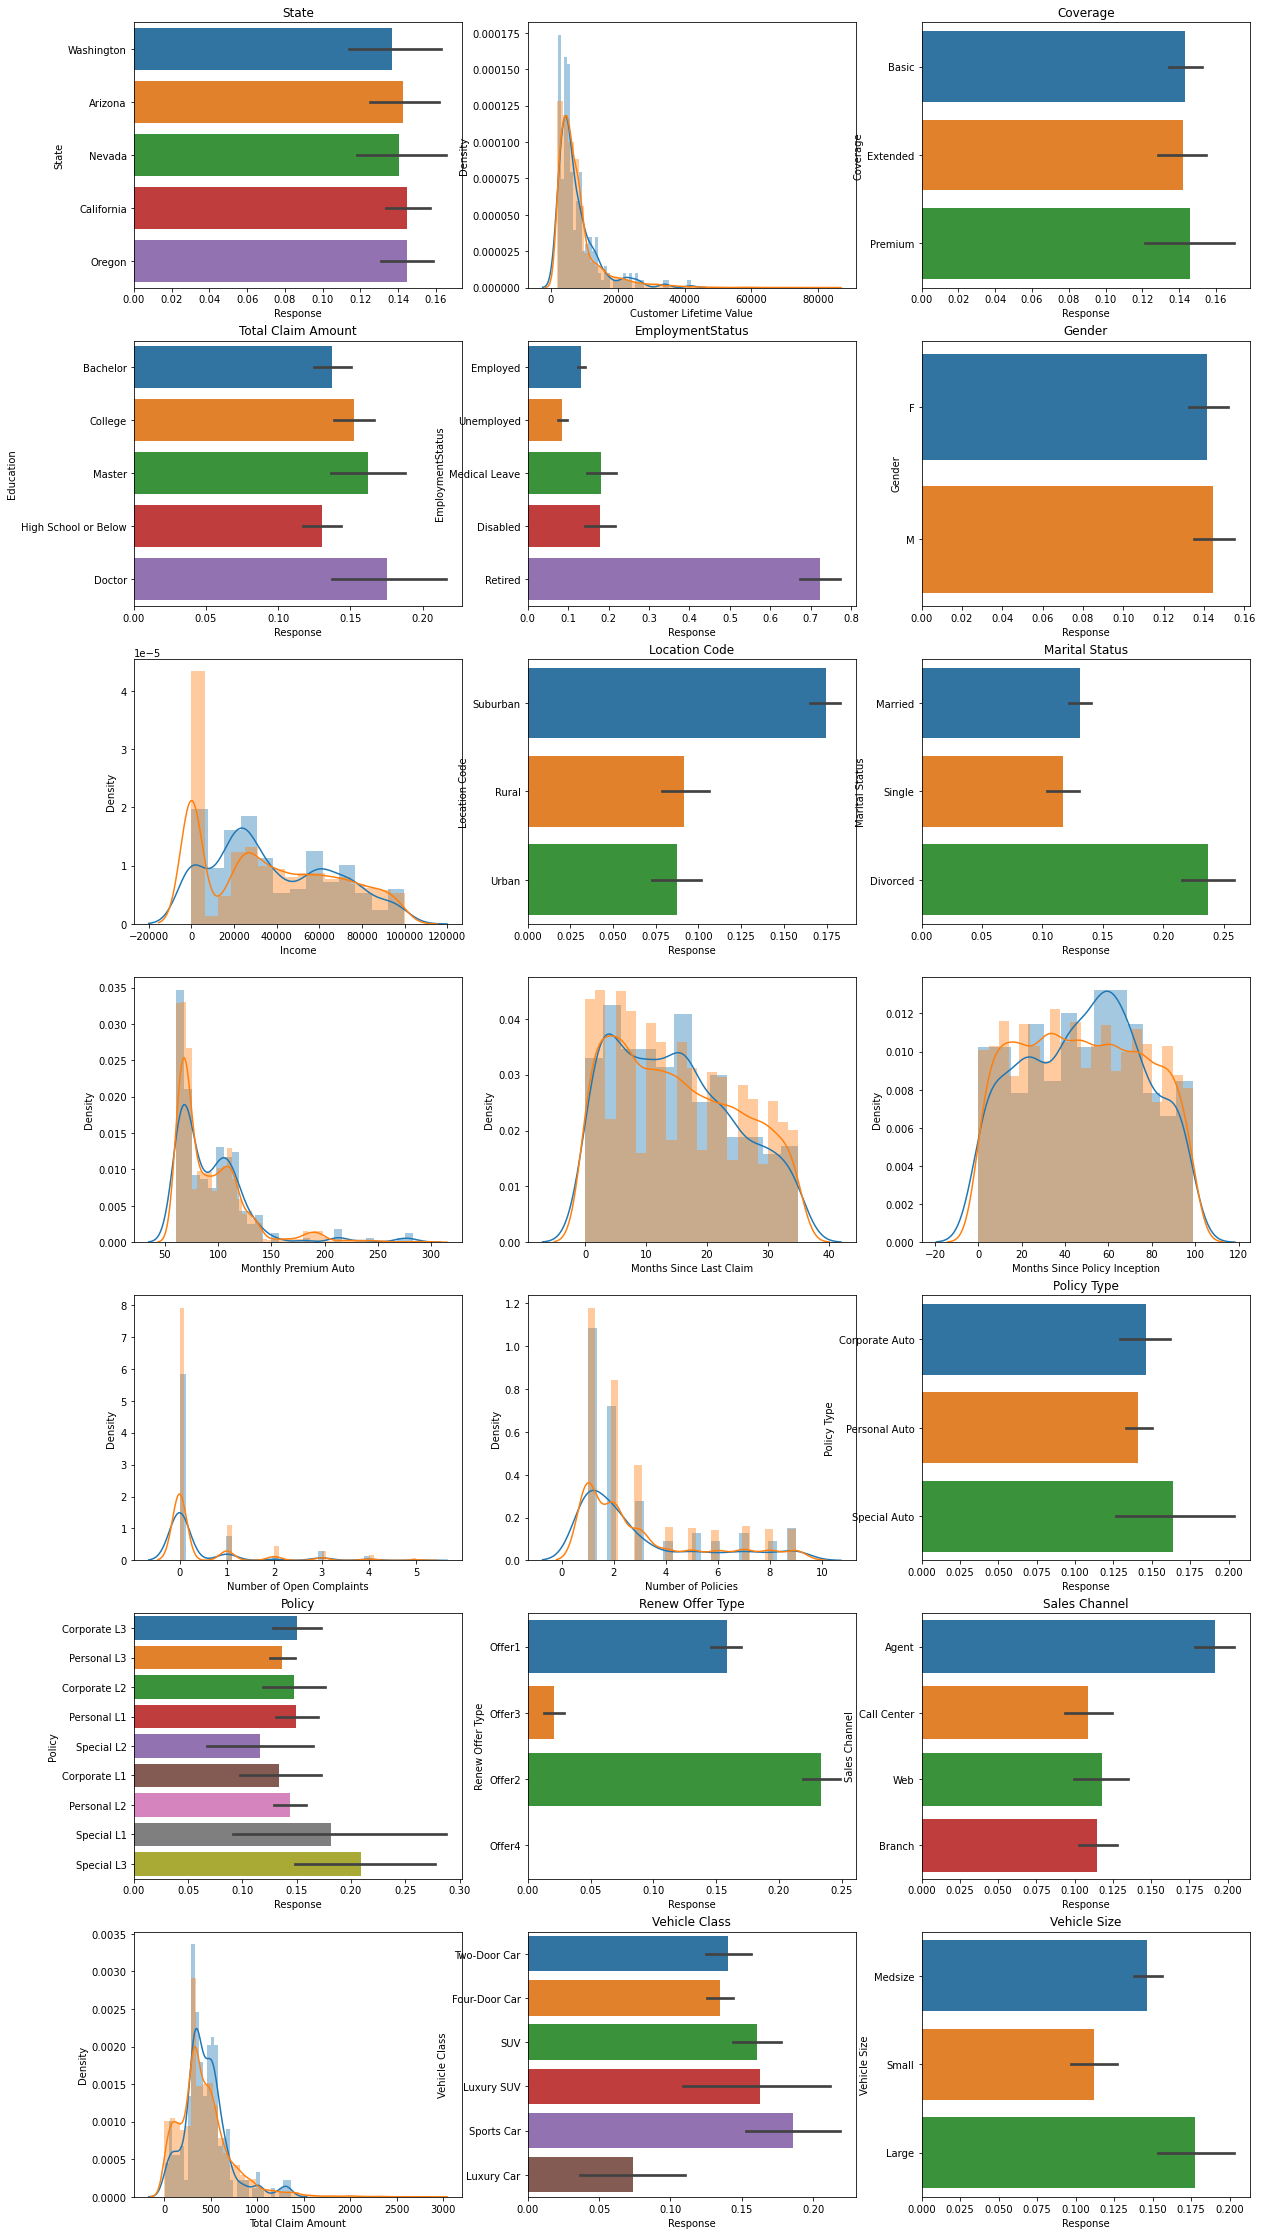

In [29]:
nbr_columns = 3
idx = 0
fig, axes = plt.subplots(7, nbr_columns, figsize=(20, 40))
for col in df.columns:
    if col != target:
        if df.dtypes[col] == object:
            sns.barplot(x=target, y=col, data=df, ax=axes[idx // nbr_columns, idx % nbr_columns], );
            axes[idx // nbr_columns, idx % nbr_columns].set_title(col)
        else: 
            sns.distplot(df[df[target] == 1][col], hist=True, label="treated", ax=axes[idx // nbr_columns, idx % nbr_columns]);
            sns.distplot(df[df[target] == 0][col], hist=True, label="not treated", ax=axes[idx // nbr_columns, idx % nbr_columns]);
            axes[1, 0].set_title(col)
        idx += 1

<AxesSubplot:xlabel='Response', ylabel='index'>

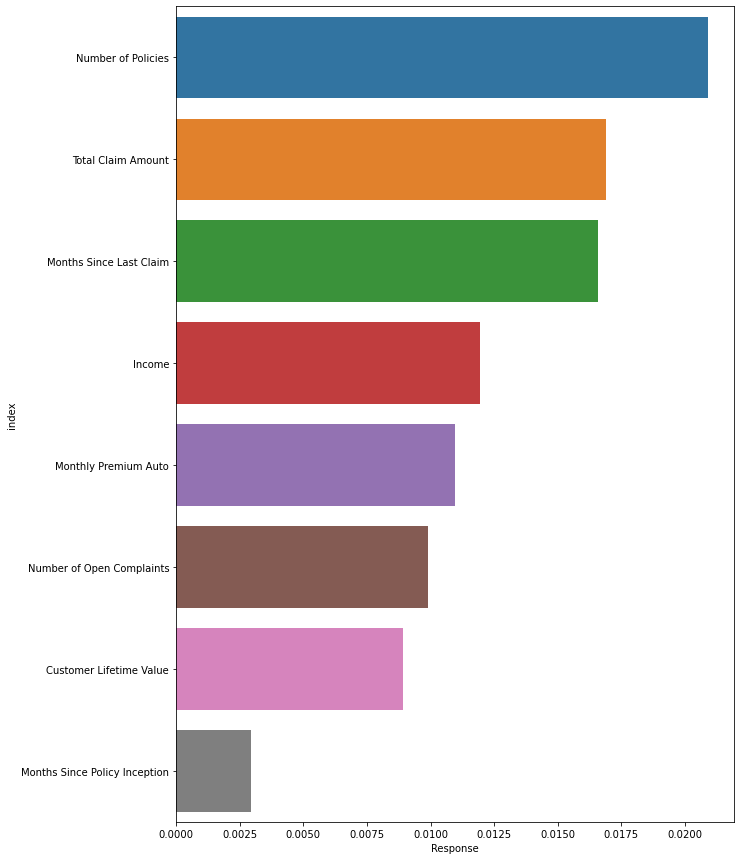

In [30]:
# correlation with Salesprice (first 20)
fig, ax = plt.subplots(figsize=(10, 15))

# computation of the correlation with target, will be used later 
correlations = df.corr()[target].reset_index()
correlations[target] = np.abs(correlations[target])
correlations = correlations.sort_values([target], ascending=False).reset_index(drop=True)
sns.barplot(ax=ax, y="index", x=target, data=correlations[1:40], orient="h")

In [32]:
print('Percentage of Yes in entire population: {:.2f}'.format(df[df['Response'] == 1].shape[0]/df.shape[0]))

Percentage of Yes in entire population: 0.14


In [18]:
# list the categorical columns to export to SF
for col in df.columns: 
    if col != "customerID":
        if df[col].dtype == object:
            print("______________________________")
            print("Column:", col)
            for name in df[col].unique():
                print(name)    
            print("______________________________")

______________________________
Column: State
Washington
Arizona
Nevada
California
Oregon
______________________________
______________________________
Column: Response
No
Yes
______________________________
______________________________
Column: Coverage
Basic
Extended
Premium
______________________________
______________________________
Column: Education
Bachelor
College
Master
High School or Below
Doctor
______________________________
______________________________
Column: EmploymentStatus
Employed
Unemployed
Medical Leave
Disabled
Retired
______________________________
______________________________
Column: Gender
F
M
______________________________
______________________________
Column: Location Code
Suburban
Rural
Urban
______________________________
______________________________
Column: Marital Status
Married
Single
Divorced
______________________________
______________________________
Column: Policy Type
Corporate Auto
Personal Auto
Special Auto
______________________________
___

In [10]:
df.